In [1]:
# project: p1
# submitter: Andrew Kazan
# partner: none
# hours: 3
# import statements
import copy
import json
import os
import pandas as pd
from subprocess import check_output, STDOUT, CalledProcessError
import numpy as np
from time import time

In [2]:
#Q1
type(7/2)

float

In [3]:
#Q2
x = 4
maximum = 10
minimum = 5
error = False if ((x > minimum) and (x < maximum)) else True# True if x is outside the minimum-to-maximum range
error

True

In [4]:
#Q3
word = "KAFKAESQUE"
word[5:]
#ignoring case, does word end with the suffix "esque"?
suffix_match = (word[5:].upper() == "ESQUE") # .endswith(...) method not allowed for this question! (practice slicing)
suffix_match

True

In [5]:
#Q4
def add(num1 = 0, num2 = 1):
    return num1 + num2 if type(num1) == int and type(num2) == int else "call function with two ints"
add(3,4)

7

In [6]:
#Q5
add(9)

10

In [7]:
#Q6
x = 4
if x < 0:
    status = "negative"
elif x > 0:
    status = "positive"
else:
    status = "zero"
status

'positive'

In [8]:
nums = [3, 4, 1, 6]
for x in nums:
    print(x)

3
4
1
6


In [9]:
def smart_count(nums):
    ret = 0
    for x in nums:
        if x < 0:
            break
        elif x > 10:
            continue
        elif x <= 10:
            ret += x
    return ret

In [10]:
#Q7
smart_count(nums)

14

In [11]:
#Q8
smart_count([2, 1, 11, 3, 15, -1, 8, 2])

6

In [12]:
header = ["A", "B", "C"]

coord1 = {"x": 8, "y": 5}
coord2 = {"x": 9, "y": 2}
coord3 = {"x": 3, "y": 1}

rows = [
    [1, 6, coord1],
    [3, 4, coord2],
    [5, 2, coord3],
]


In [13]:
#Q9 
coord3["z"] = 3.14
rows

[[1, 6, {'x': 8, 'y': 5}],
 [3, 4, {'x': 9, 'y': 2}],
 [5, 2, {'x': 3, 'y': 1, 'z': 3.14}]]

In [14]:
#Q10
rows[0][2]["x"]

8

In [15]:
#Q11
v2 = copy.copy(rows)
v2[0] = 8888    # first change
v2[1][1] = 9999 # second change
rows

[[1, 6, {'x': 8, 'y': 5}],
 [3, 9999, {'x': 9, 'y': 2}],
 [5, 2, {'x': 3, 'y': 1, 'z': 3.14}]]

In [16]:
#Q12
sum(row[header.index("B")] for row in rows)

10007

In [17]:
#Q13
rows.sort(key=lambda row: row[header.index("B")], reverse=False)
rows

[[5, 2, {'x': 3, 'y': 1, 'z': 3.14}],
 [1, 6, {'x': 8, 'y': 5}],
 [3, 9999, {'x': 9, 'y': 2}]]

In [18]:
#Q14

f = open("usd.json")
data = json.load(f)
f.close()
data["eur"]["rate"] * 400

371.722137500096

In [19]:
def divide(num1, num2):
    try:
        return num1 / num2
    except ZeroDivisionError:
        return float("nan")

In [20]:
#Q15
divide(3, 2)

1.5

In [21]:
#Q16
divide(-3, 0)

nan

In [22]:


years = {}
keys = []
data_frames = []

for val in os.listdir("home-computers"):
   if val[len(val) - 4:] == ".csv":
    df = pd.read_csv("home-computers/" + val, skiprows=1)
    #df.set_index("Geographic Area Name")
    data_frames.append(df)
    keys.append(int(val[7:11]))
for key, df in zip(keys, data_frames):
    years[key] = df
    #df.set_index("Geographic Area Name")

In [23]:
#Q17
sorted(years.keys())

[2013, 2014, 2015, 2016, 2017, 2018]

In [24]:
#Q18
years[2018].set_index('Geographic Area Name').loc['Wisconsin', 'Estimate!!Total']


2371960

In [25]:
#Q19
sum(years[2018]["Estimate!!Total!!No Computer"])

10285814

In [26]:
#Q20
max(years[2018]['Margin of Error!!Total!!No Computer'] / years[2018]['Estimate!!Total!!No Computer'])

0.12375641594322287

In [27]:
#Q21

def q_21(state):
    return years[2018].set_index('Geographic Area Name').loc[state, 'Estimate!!Total!!No Computer'] / years[2018].set_index('Geographic Area Name').loc[state, 'Estimate!!Total']

states = ["Illinois", "Indiana", "Iowa", "Michigan", "Minnesota", "Wisconsin"]
new_dict = {state: (q_21(state) * 100) for state in states}

new_dict

{'Illinois': 8.524143737625552,
 'Indiana': 9.463486214247707,
 'Iowa': 9.468929459023103,
 'Michigan': 8.936374942955922,
 'Minnesota': 7.491847623005652,
 'Wisconsin': 9.582497175331794}

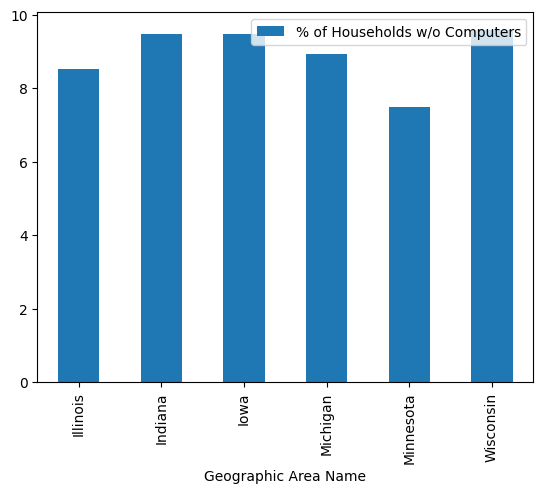

In [28]:
#Q22
vals = [q_21(state) * 100 for state in states]
df = pd.DataFrame({'Geographic Area Name':states, '% of Households w/o Computers':vals})
ax = df.plot.bar(x='Geographic Area Name', y='% of Households w/o Computers')

<AxesSubplot:>

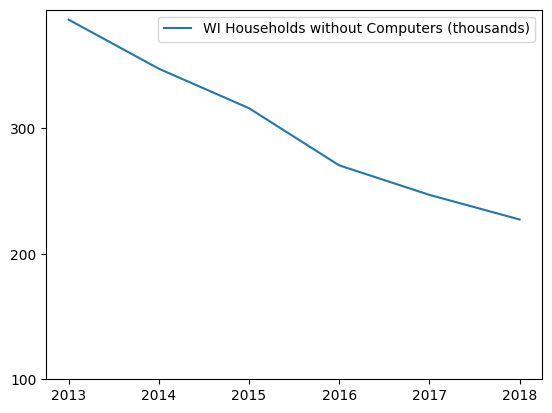

In [29]:
#Q23
dates = [2013, 2014, 2015, 2016, 2017, 2018]
stat = []
for x in dates:
    stat.append(years[x].set_index('Geographic Area Name').loc['Wisconsin', 'Estimate!!Total!!No Computer'] / 1000)
df = pd.DataFrame({
   'WI Households without Computers (thousands)': stat,
   }, index = dates)
df.plot.line(yticks = [100,200,300])

<AxesSubplot:xlabel='Smartphones', ylabel='Tablets'>

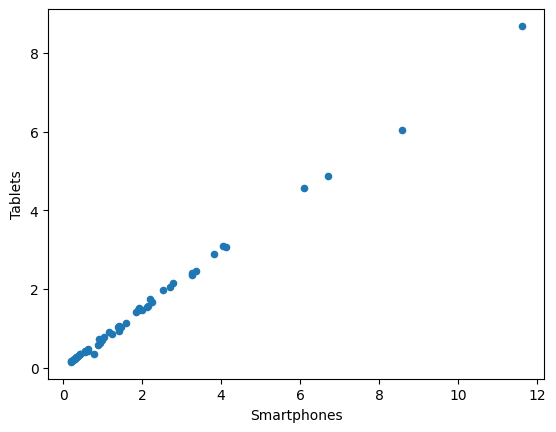

In [30]:
#Q24
df = pd.DataFrame({'Smartphones': years[2018]['Estimate!!Total!!Has one or more types of computing devices!!Smartphone']/1e6, 'Tablets': years[2018]['Estimate!!Total!!Has one or more types of computing devices!!Tablet or other portable wireless computer']/1e6})
df.plot.scatter(x='Smartphones', y='Tablets')

In [31]:
#Q25

check_output(["git","checkout","main"], cwd="flask")
output = check_output(["git","log"], cwd='flask')
output_list = str(output, "utf-8").split('\n')
output_list[0]

Previous HEAD position was 9e50ad55 pin os and python version in rtd build
Switched to branch 'main'


'commit 660994efc761efdfd49ca442b73f6712dc77b6cf'

In [32]:
#Q26
commit_numbers = []
for x in output_list:
    if x.startswith('commit'):
        commit_numbers.append(x[7:])
earliest_30 = commit_numbers[len(commit_numbers) - 30:]
earliest_30
#commit_numbers[0][7:]

['03148dba6b26a2694da1d466584f50189c52e7b3',
 'ef524f2cfd65377b3b9ce896e7a710472b13c0f6',
 'f2dc38cda61f76c64b97ab9f730accc986a4b188',
 '03168a5d53457fdb8676a4ac9fca0f76a23c6852',
 '0b8e01b4450d0ba8cb65751d866568fddc155fa4',
 '6a3a046f55755f0691568431e68a8bfea8d89df0',
 'd78b04a3fca8d8887382606897d4a97e55062fda',
 '4671429a509094f36e2294055340197091d39979',
 '4e7aa9e7f7a86ee0ea4b6801694c13151518cb52',
 '85ca089dde8814c4a42ad4574cddce25d60e5e25',
 '8171da88a49eba769d313a51591ee8575be59762',
 'df929c6c77ea5490a969275e45075c29711a498c',
 '574e81f9c8bbdc41958e1e7a7613633b091101f8',
 '1fff3e598126a084348ec2c112fdd3bc6b9a1ee0',
 '05f36c7f7e2df36ee28f90d99632162579b1287c',
 '4e1b3e1134eb478563bc434d794085d0a412cb84',
 '8e9bd5f009bb8756a2a7d76a4b792323eeee49d6',
 '9dfab582d065521e9350327801ed2c5ced1c8fa1',
 '3d719f35f5c1ee4ce3dc01fb2167ef49c0180cf6',
 '7d6b8e9ab3e738d69e39ad53a7c0f6a552d5284a',
 'a9d4ea81da28ee9c894bf9d45adc4cfa9d52fddc',
 '727c701686c18c4a27ca523eb0c5862d497be24e',
 '4edec48b

In [33]:
#Q27
check_output(["git","checkout",commit_numbers[1]], cwd="flask")
check_output(["cat", "README.rst"], cwd= "flask")
#f = open("README", "r")
#f.read()

Note: switching to '9e50ad55ae6c3938c2ffd0cad89942c12fca865c'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at 9e50ad55 pin os and python version in rtd build


b'Flask\n=====\n\nFlask is a lightweight `WSGI`_ web application framework. It is designed\nto make getting started quick and easy, with the ability to scale up to\ncomplex applications. It began as a simple wrapper around `Werkzeug`_\nand `Jinja`_ and has become one of the most popular Python web\napplication frameworks.\n\nFlask offers suggestions, but doesn\'t enforce any dependencies or\nproject layout. It is up to the developer to choose the tools and\nlibraries they want to use. There are many extensions provided by the\ncommunity that make adding new functionality easy.\n\n.. _WSGI: https://wsgi.readthedocs.io/\n.. _Werkzeug: https://werkzeug.palletsprojects.com/\n.. _Jinja: https://jinja.palletsprojects.com/\n\n\nInstalling\n----------\n\nInstall and update using `pip`_:\n\n.. code-block:: text\n\n    $ pip install -U Flask\n\n.. _pip: https://pip.pypa.io/en/stable/getting-started/\n\n\nA Simple Example\n----------------\n\n.. code-block:: python\n\n    # save this as app.py\n 

In [34]:
#Q28
users = {}
names = []

logs = str(check_output(["git","log"], cwd="flask")).split("\\n")
for line in logs:
    if "Merge pull request" in line and "/" in line:
        #print(line[line.index("/")])
        if "from" in line:
            username = line.split("from")[1].split("/")[0].strip()
            names.append(username)
            if username in users.keys():
                users[username] += 1
                continue
            else:
                users.update({username: names.count(username)})
five_or_more = {}
for key in users:
    if users[key] >= 5:
        five_or_more.update({key: users[key]})
five_or_more['pallets'] += 24
five_or_more['pgjones'] += 1
five_or_more

{'pallets': 204,
 'greyli': 42,
 'pgjones': 14,
 'ThiefMaster': 11,
 'jeffwidman': 8,
 'garenchan': 8,
 'davidism': 45,
 'dawran6': 7,
 'untitaker': 20,
 'lord63-forks': 5,
 'methane': 5,
 'Winnetou': 6,
 'defuz': 6,
 'ThomasWaldmann': 13,
 'SimonSapin': 11}

In [35]:
#Q29
try:
    msg = check_output(["pip3", "instal"], stderr=STDOUT)
except CalledProcessError as e:
    msg = e.output
str(msg)[2:len(str(msg))-4] + "\"\n"

'ERROR: unknown command "instal" - maybe you meant "install"\n'

<AxesSubplot:xlabel='Rows', ylabel='Milliseconds'>

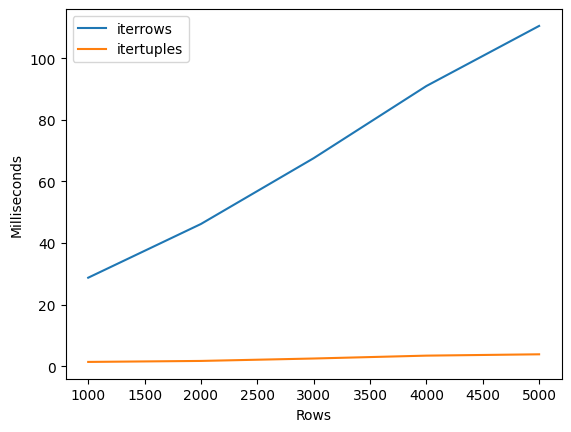

In [36]:
#Q30
def rand_df(rows):
    return pd.DataFrame(np.random.randint(10, size=(rows, 4)),
                        columns=["A", "B", "C", "D"],
                        index=[f"r{i}" for i in range(1, rows+1)])


time_iterrows = {1000: None, 2000: None, 3000: None, 4000: None, 5000: None}
time_itertuples = {1000: None, 2000: None, 3000: None, 4000: None, 5000: None}

for num in time_iterrows:
    df = rand_df(num)
    t0 = time()
    for row in df.iterrows():
        pass
    t1 = time()
    time_iterrows[num] = (t1 - t0) * 1000

for num in time_itertuples:
    df = rand_df(num)
    t0 = time()
    for row in df.itertuples():
        pass
    t1 = time()
    time_itertuples[num] = (t1 - t0) * 1000

times_df = pd.DataFrame(dtype=float)

for num in time_iterrows:
    times_df.at[num, "iterrows"] = time_iterrows[num]

for num in time_itertuples:
    times_df.at[num, "itertuples"] = time_itertuples[num]

times_df.plot.line(xlabel="Rows", ylabel="Milliseconds")


<AxesSubplot:xlabel='Rows', ylabel='Milliseconds'>

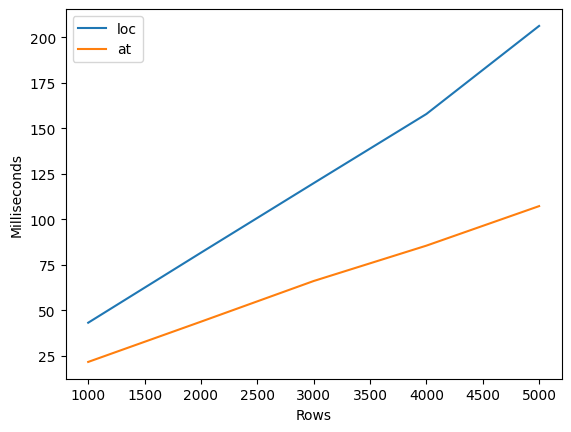

In [37]:
#Q31
time_loc = {1000: None, 2000: None, 3000: None, 4000: None, 5000: None}
time_at = {1000: None, 2000: None, 3000: None, 4000: None, 5000: None}
total = 0
for num in time_loc:
    df = rand_df(num)
    t0 = time()
    for idx in df.index:
        for col in df.columns:
            total += df.loc[idx, col]
    t1 = time()
    time_loc[num] = (t1 - t0) * 1000
total = 0
for num in time_at:
    df = rand_df(num)
    t0 = time()
    for idx in df.index:
        for col in df.columns:
            total += df.at[idx, col]
    t1 = time()
    time_at[num] = (t1 - t0) * 1000

times_df = pd.DataFrame(dtype=float)

for num in time_loc:
    times_df.at[num, "loc"] = time_loc[num]

for num in time_at:
    times_df.at[num, "at"] = time_at[num]
times_df.plot.line(xlabel="Rows", ylabel="Milliseconds")


<AxesSubplot:xlabel='Rows', ylabel='Milliseconds'>

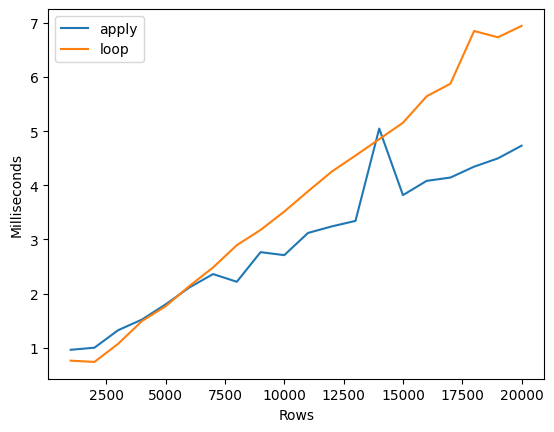

In [38]:
#Q32
def laugh(x):
    return "ha" * x


nums = [1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000,16000,17000,18000,19000,20000]
times_apply = {num: None for num in nums}
times_loop = {num: None for num in nums}
times_df = pd.DataFrame(dtype=float)
for num in times_apply:
    df = rand_df(num)
    t0 = time()
    result = df["A"].apply(laugh).tolist()
    t1 = time()
    times_apply[num] = (t1 - t0) * 1000

for num in times_loop:
    df = rand_df(num)
    t0 = time()
    result = []
    for val in df["A"]:
        result.append(laugh(val))
    t1 = time()
    times_loop[num] = (t1 - t0) * 1000

for num in times_apply:
    times_df.at[num, "apply"] = times_apply[num]

for num in times_loop:
    times_df.at[num, "loop"] = times_loop[num]
times_df.plot.line(xlabel="Rows", ylabel="Milliseconds")
